## Import libraries

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [109]:
df = pd.read_csv('churn_data.csv', 
index_col = 'customerID')
df.tail()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


In [111]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Check for outliers in numeric data

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


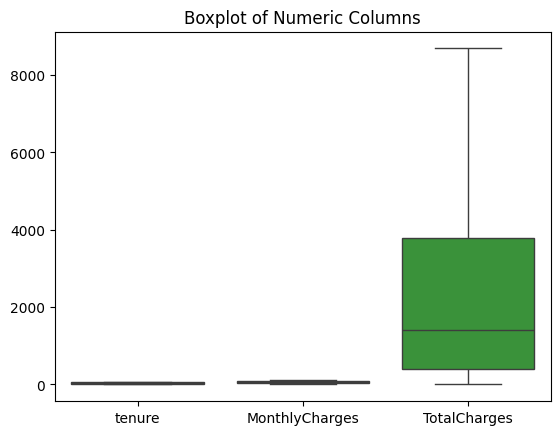

In [112]:
numeric_columns = df.select_dtypes(include=np.number).columns
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot of Numeric Columns")
plt.show()

In [113]:
# loop through numeric columns and check for outliers
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    outliers = df[(df[column] < lower_boundary) | (df[column] > upper_boundary)][column]
    if outliers.shape[0] > 0:
        print(outliers)
    else:
        print(f'no outliers for {column}')

no outliers for tenure
no outliers for MonthlyCharges
no outliers for TotalCharges


## Check for Missing values

In [114]:
print("Missing Values")
print(df.isna().sum())


Missing Values
tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64


In [115]:
# fill missing values with median
df.fillna(df['TotalCharges'].median(), inplace=True)

In [116]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


## Convert Categorical columns to numeric

In [117]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [118]:
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1})
df.sample()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7663-CUXZB,59,1,Two year,Electronic check,113.75,6561.25,0


In [119]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 3,'Mailed check': 2,'Bank transfer (automatic)': 1,'Credit card (automatic)': 0})

In [120]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [121]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,3,29.85,29.85,0
5575-GNVDE,34,1,1,2,56.95,1889.50,0
3668-QPYBK,2,1,0,2,53.85,108.15,1
7795-CFOCW,45,0,1,1,42.30,1840.75,0
9237-HQITU,2,1,0,3,70.70,151.65,1


## Feature Engineering

## Ratio of TotalCharges to Tenure

In [122]:
df[df['tenure'] == 0]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
4472-LVYGI,0,0,2,1,52.55,1397.475,0
3115-CZMZD,0,1,2,2,20.25,1397.475,0
5709-LVOEQ,0,1,2,2,80.85,1397.475,0
4367-NUYAO,0,1,2,2,25.75,1397.475,0
1371-DWPAZ,0,0,2,0,56.05,1397.475,0
7644-OMVMY,0,1,2,2,19.85,1397.475,0
3213-VVOLG,0,1,2,2,25.35,1397.475,0
2520-SGTTA,0,1,2,2,20.00,1397.475,0
2923-ARZLG,0,1,1,2,19.70,1397.475,0


In [124]:
# Replace 0 tenure with NaN
df.loc[df['tenure'] == 0, 'tenure'] = np.nan

# Fill NaN values with median tenure
df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [125]:
df['TotalCharges_Tenure_Ratio'] = df['TotalCharges'] / df['tenure']

## Histogram of TotalCharges_Tenure_Ratio

<Axes: xlabel='TotalCharges_Tenure_Ratio', ylabel='Count'>

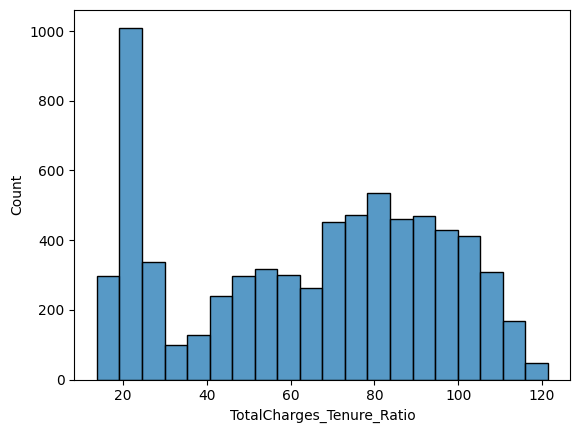

In [126]:

sns.histplot(data=df, x='TotalCharges_Tenure_Ratio')


In [127]:
df.isna().sum()

tenure                       0
PhoneService                 0
Contract                     0
PaymentMethod                0
MonthlyCharges               0
TotalCharges                 0
Churn                        0
TotalCharges_Tenure_Ratio    0
dtype: int64

In [128]:
df.sample(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Tenure_Ratio
customerID,,,,,,,,
7234-FECYN,8.0,1,0,3,101.35,780.50,1,97.562500
4459-BBGHE,30.0,0,0,3,44.50,1307.80,0,43.593333
8741-LQOBK,46.0,0,0,1,35.05,1620.25,0,35.222826
7244-QWYHG,50.0,0,1,1,44.45,2188.45,0,43.769000
4987-GQWPO,17.0,0,0,0,25.10,382.80,0,22.517647


In [129]:
df.to_csv('prepped_churn_data.csv')

## Summary

We perform a comprehensive analysis of a customer churn dataset. The initial exploration involves examining the distribution of the target variable, *Churn*, revealing that 5174 customers did not churn, while 1869 customers did. A boxplot is generated to visualize the distribution of numeric columns, highlighting potential outliers. The subsequent handling of outliers involves clipping values based on the interquartile range. Missing values in the *TotalCharges* column are identified and addressed by dropping corresponding entries. Categorical-to-numeric conversion is performed for the *Churn* *Contract* and *PhoneService* columns. Feature engineering includes creation of a new feature - *TotalCharges_Tenure_Ratio*. In the process, we found there were some tenure values of 0, which appear to be actually missing values. We set these to NaN then filled them with the median value before creating the new feature. We now have the data saved in a CSV file named - prepped_churn_data - and ready for next steps.